## Bike Usage Prediction Challenge (Regersion) - First Nuwe Project

### Libraries

In [70]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Scikit
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, confusion_matrix,classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve

# Others
from statsmodels.formula.api import ols
import statsmodels.api as sm
import json as json


In [71]:
data = pd.read_csv('train.csv')
data.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [72]:
data.tail()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
13898,2012-08-07,3,1,8,7,0,2,1,2,0.70,0.6667,0.74,0.1343,502
13899,2012-08-07,3,1,8,8,0,2,1,2,0.70,0.6515,0.70,0.1642,705
13900,2012-08-07,3,1,8,9,0,2,1,2,0.70,0.6667,0.74,0.1343,327
13901,2012-08-07,3,1,8,10,0,2,1,2,0.74,0.6970,0.70,0.1343,250
13902,2012-08-07,3,1,8,11,0,2,1,2,0.76,0.7273,0.66,0.0896,214


### Data Cleaning and Investigation

In [73]:
data.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [74]:
data.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000
mean,2.263828,0.378192,5.650147,11.546573,0.027404,2.999425,0.684457,1.419981,0.499170,0.478017,0.622996,0.194097,174.639143
std,1.036254,0.484953,3.218423,6.912235,0.163264,2.005710,0.464749,0.644060,0.197716,0.176614,0.198194,0.123023,166.955414
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,3.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.470000,0.104500,37.000000
50%,2.000000,0.000000,5.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.620000,0.194000,130.000000
75%,3.000000,1.000000,8.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.790000,0.283600,258.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,957.000000


First explanation:
- Year if 0 is 2011 and if 1 is 2012
- Season 1,2,3,4 in this order spring, summer, fall, winter
- Month from 1 to 12
- Hours of the day, from 0 to 23
- Holiday and working day binary variables
- Temp, Weathershit and Humidity not sure right now


#### Exploring Varaibles

##### Wordingday and Holiday

In [75]:
# Check if 'holiday' and 'workingday' are opposites for each row
data['are_opposites'] = data['holiday'] != data['workingday']
non_opposite_cases = data[data['are_opposites'] == False]
non_opposite_cases['season'].count()

4006

In [76]:
correlation = data['holiday'].corr(data['workingday'])
correlation

-0.24722103570287152

Theya are not excluent so we can save the variable because is giving us interesting information.

##### Weather Variables

In [77]:
weather = data[['weathersit','temp','atemp','hum','windspeed']]

In [78]:
# Histogramas y boxplots
for column in weather.columns:
    figure = px.histogram(weather, x=column, marginal="box", color_discrete_sequence=["lightblue"])
    figure.update_layout(title_text= f" Histogram and Boxplot of {column}", paper_bgcolor="white", plot_bgcolor="white")
    figure.show()

##### Undrstanding Weathersit variable

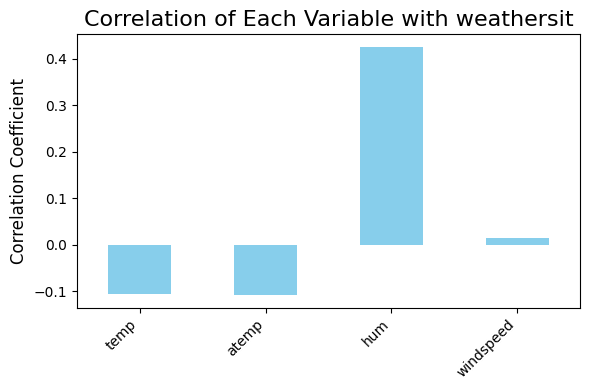

In [79]:
# Correlations ammong these variables and the Weathersit
corr_matrix = weather.corr()

survived_corr = corr_matrix['weathersit'].drop('weathersit')

plt.figure(figsize=(6, 4))
survived_corr.plot(kind='bar', color='skyblue')

plt.title('Correlation of Each Variable with weathersit', fontsize=16)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.xticks(rotation=45, ha='right') 

# Show plot
plt.tight_layout()
plt.show()

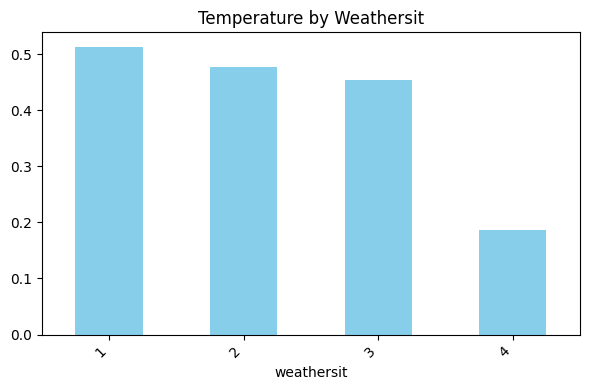

In [80]:
weathersit_temp = weather.groupby('weathersit')['temp'].mean()

plt.figure(figsize=(6, 4))
weathersit_temp.plot(kind='bar', color='skyblue')

plt.title('Temperature by Weathersit')
plt.xticks(rotation=45, ha='right') 

plt.tight_layout()
plt.show()

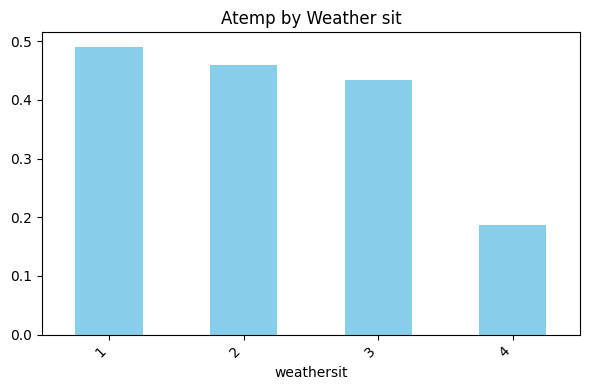

In [81]:
weathersit_atemp = weather.groupby('weathersit')['atemp'].mean()

plt.figure(figsize=(6, 4))
weathersit_atemp.plot(kind='bar', color='skyblue')

plt.title('Atemp by Weather sit')
plt.xticks(rotation=45, ha='right') 

plt.tight_layout()
plt.show()

We are not observing interesting findings, so we assume this variable is coming by a combiantion of the other 3, we will have to check carefully the correlations.

##### Creating the Day Variable

In [82]:
# Convert 'dteday' column to datetime format
data['dteday'] = pd.to_datetime(data['dteday'])
data['monthday'] = data['dteday'].dt.day

data.tail()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,are_opposites,monthday
13898,2012-08-07,3,1,8,7,0,2,1,2,0.70,0.6667,0.74,0.1343,502,True,7
13899,2012-08-07,3,1,8,8,0,2,1,2,0.70,0.6515,0.70,0.1642,705,True,7
13900,2012-08-07,3,1,8,9,0,2,1,2,0.70,0.6667,0.74,0.1343,327,True,7
13901,2012-08-07,3,1,8,10,0,2,1,2,0.74,0.6970,0.70,0.1343,250,True,7
13902,2012-08-07,3,1,8,11,0,2,1,2,0.76,0.7273,0.66,0.0896,214,True,7


In [83]:
data = data.drop(columns = ['are_opposites','dteday'])

##### Investingating cosumer patterns

*By weather situation*

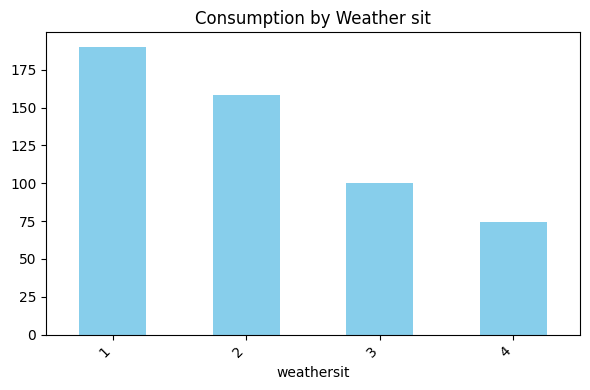

In [84]:
weathersit_consumption = data.groupby('weathersit')['cnt'].mean()

plt.figure(figsize=(6, 4))
weathersit_consumption.plot(kind='bar', color='skyblue')

plt.title('Consumption by Weather sit')
plt.xticks(rotation=45, ha='right') 

plt.tight_layout()
plt.show()

*By weekday*

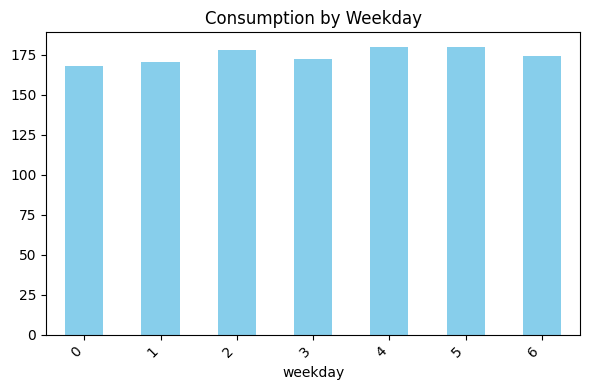

In [85]:
weekday_consumption = data.groupby('weekday')['cnt'].mean()

plt.figure(figsize=(6, 4))
weekday_consumption.plot(kind='bar', color='skyblue')

plt.title('Consumption by Weekday')
plt.xticks(rotation=45, ha='right') 

plt.tight_layout()
plt.show()

*By Season*

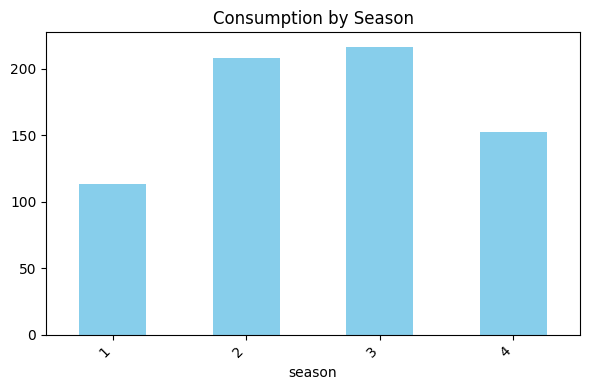

In [86]:
season_consumption = data.groupby('season')['cnt'].mean()

plt.figure(figsize=(6, 4))
season_consumption.plot(kind='bar', color='skyblue')

plt.title('Consumption by Season')
plt.xticks(rotation=45, ha='right') 

plt.tight_layout()
plt.show()

*By monthday*

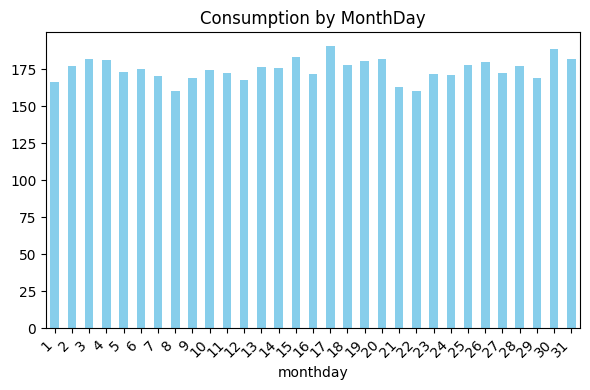

In [87]:
monthday_consumption = data.groupby('monthday')['cnt'].mean()

plt.figure(figsize=(6, 4))
monthday_consumption.plot(kind='bar', color='skyblue')

plt.title('Consumption by MonthDay')
plt.xticks(rotation=45, ha='right') 

plt.tight_layout()
plt.show()

### Feature Selection

##### Correlations

In [88]:
column_names = list(data.columns.values) 
column_names.insert(1, column_names[-1])  
column_names.pop()
data = data[column_names]
data.head()

,season,monthday,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


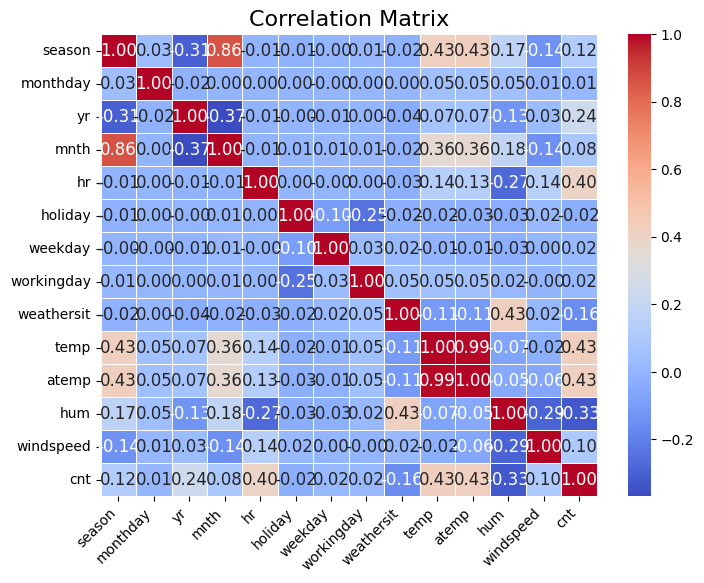

In [89]:
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5, annot_kws={"size": 12})

heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment="right")
plt.title("Correlation Matrix", fontsize=16)
plt.show()

As expected, the correlation between month and season is super high, so we will have to chose one of the two variables. Taking into account that with the month we have more information, I have chose to delete season. Same happens with temp and atemp.

In [90]:
data = data.drop(columns = ['season','atemp'])

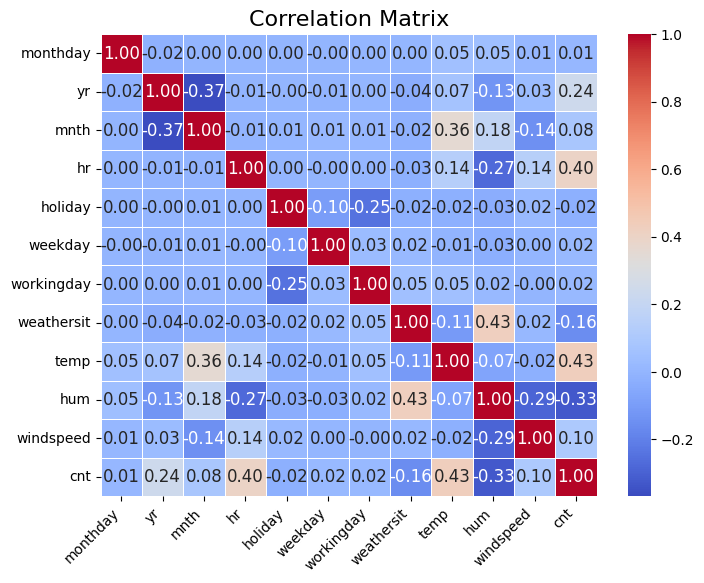

In [91]:
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5, annot_kws={"size": 12})

heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment="right")
plt.title("Correlation Matrix", fontsize=16)
plt.show()

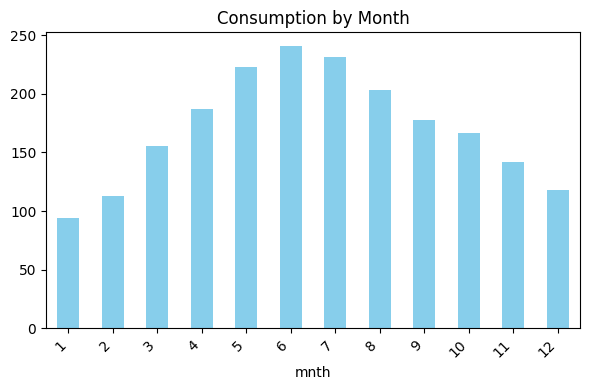

In [92]:
monthly_consumption = data.groupby('mnth')['cnt'].mean()

plt.figure(figsize=(6, 4))
monthly_consumption.plot(kind='bar', color='skyblue')

plt.title('Consumption by Month')
plt.xticks(rotation=45, ha='right') 

plt.tight_layout()
plt.show()

##### PCA

In [93]:
data_pca = data.drop(columns='cnt')

scale = StandardScaler()
data_pca_scaled = scale.fit_transform(data_pca)

pca = PCA(random_state=79)
x_pca = pca.fit_transform(data_pca_scaled)

explained_variance_ratio = pd.Series(pca.explained_variance_ratio_)
variance_cumulated = explained_variance_ratio.cumsum()

print(explained_variance_ratio.round(2))


0     0.16
1     0.14
2     0.12
3     0.10
4     0.09
5     0.09
6     0.09
7     0.07
8     0.07
9     0.04
10    0.04
dtype: float64


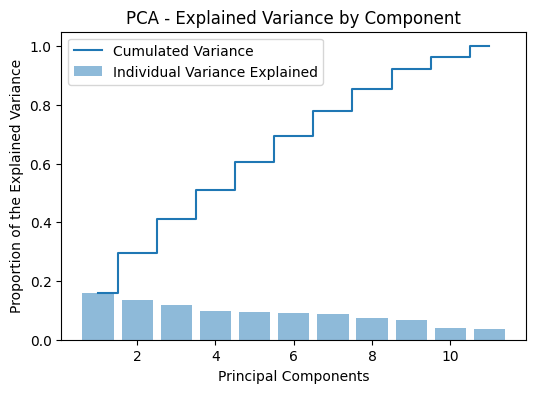

In [94]:
plt.figure(figsize=(6, 4))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Individual Variance Explained')
plt.step(range(1, len(explained_variance_ratio) + 1), variance_cumulated, where='mid', label='Cumulated Variance')
plt.xlabel('Principal Components')
plt.ylabel('Proportion of the Explained Variance')
plt.title('PCA - Explained Variance by Component')
plt.legend(loc='best')
plt.show()


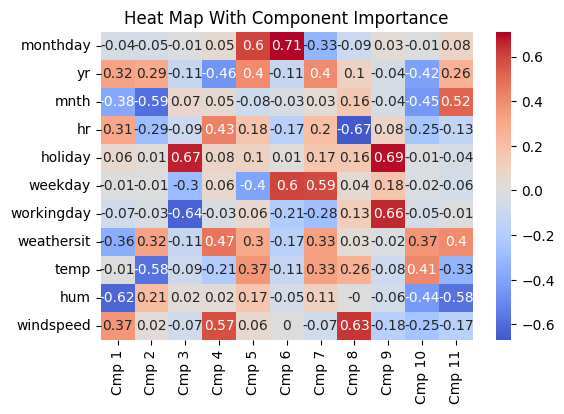

In [95]:
loadings = pd.DataFrame(pca.components_.T, columns=[f"Cmp {i+1}" for i in range(pca.components_.shape[0])]
                        , index=data_pca.columns)

# Heat Map of the Components
plt.figure(figsize=(6, 4))
sns.heatmap(loadings.round(2), annot=True, cmap='coolwarm', center=0)
plt.title('Heat Map With Component Importance')
plt.show()

It's hard to see any variable not selected or with a relatively big importance in one of components, which are key to get a good impact on the target value.

##### ANOVA TEST

In [96]:
categorical = data[['yr','mnth','holiday','weekday','workingday','cnt']]
categorias = categorical.columns

In [97]:
anova = {}

for variable in categorias:
    model = ols(f'{variable} ~ C(cnt)', data=categorical).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    anova[variable] = anova_table

# Mostrar los resultados de ANOVA para cada variable
for variable, resultado in anova.items():
    print(f'Results ANOVA for {variable}')
    print(resultado)
    print('\n')


Results ANOVA for yr
               sum_sq       df         F        PR(>F)
C(cnt)     373.763989    788.0  2.148089  6.106049e-62
Residual  2895.703752  13114.0       NaN           NaN


Results ANOVA for mnth
                 sum_sq       df         F    PR(>F)
C(cnt)      9771.157762    788.0  1.211457  0.000067
Residual  134229.159436  13114.0       NaN       NaN


Results ANOVA for holiday
              sum_sq       df         F    PR(>F)
C(cnt)     16.530965    788.0  0.777087  0.999998
Residual  354.028051  13114.0       NaN       NaN


Results ANOVA for weekday
                sum_sq       df         F    PR(>F)
C(cnt)     3161.699719    788.0  0.997216  0.515307
Residual  52764.295677  13114.0       NaN       NaN


Results ANOVA for workingday
               sum_sq       df         F        PR(>F)
C(cnt)     223.533653    788.0  1.338553  1.969422e-09
Residual  2779.177416  13114.0       NaN           NaN


Results ANOVA for cnt
                sum_sq       df             F  P

Analizing the results, we can see that there are several variables in which we can observe an stadistical significant diference among their classes and the cnt variable. The P-Value is lower than 0.05 in the variables Workingday, mnth and yr.

##### Entropy Analysis - Shared Information

C:\Users\Marc\AppData\Local\Temp\ipykernel_8988\1657327795.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




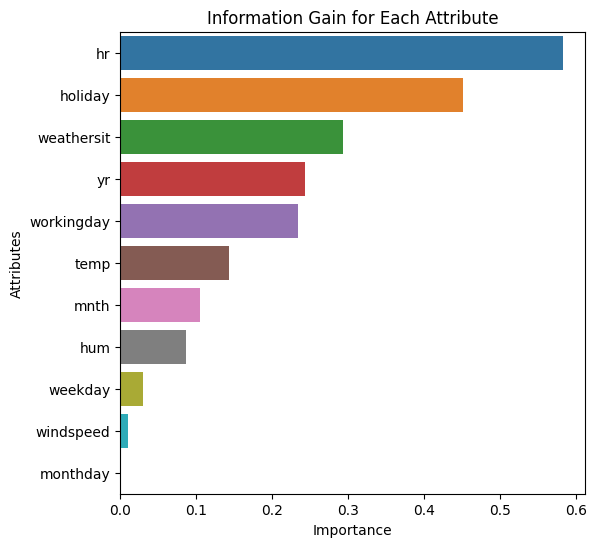

In [98]:
features = data.drop(columns=['cnt'])

scale = StandardScaler()
features_scaled = scale.fit_transform(features)

# Calculate information gain
info_gain = mutual_info_classif(features_scaled, data['cnt'])

# Create a DataFrame for plotting
ig_df = pd.DataFrame({'attributes': features.columns, 'importance': info_gain})
ig_df = ig_df.sort_values(by='importance', ascending=False)

# Plot the information gain
plt.figure(figsize=(6, 6))
sns.barplot(x='importance', y='attributes', data=ig_df, palette='tab10')
plt.title('Information Gain for Each Attribute')
plt.xlabel('Importance')
plt.ylabel('Attributes')
plt.show()

We see that the are some variables, mainly hr, weathersit, yr and working day, that share quite a lot of information with the target value. Again, holiday, weekday are not that much important, so after analysing the ANOVA test and this one, I think we can discard them.

In [99]:
data_reduced = data.drop(columns = ['monthday','weekday'])

### Modeling

##### Training and Testing Sets

In [100]:
data_reduced.head()

,yr,mnth,hr,holiday,workingday,weathersit,temp,hum,windspeed,cnt
0,0,1,0,0,0,1,0.24,0.81,0.0,16
1,0,1,1,0,0,1,0.22,0.80,0.0,40
2,0,1,2,0,0,1,0.22,0.80,0.0,32
3,0,1,3,0,0,1,0.24,0.75,0.0,13
4,0,1,4,0,0,1,0.24,0.75,0.0,1


In [101]:
X = data_reduced.drop("cnt", axis=1)  
y = data_reduced["cnt"]

X_train_0, X_test_0, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

print("Train:", X_train_0.shape, y_train.shape)
print("Test:", X_test_0.shape, y_test.shape)

Train: (11122, 9) (11122,)
Test: (2781, 9) (2781,)


In [102]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train_0)
X_test = scaler.transform(X_test_0)

print("After Scaling:")
print("X_train scaled:", X_train.shape)
print("X_test scaled:", X_test.shape)

After Scaling:
X_train scaled: (11122, 9)
X_test scaled: (2781, 9)


##### Linear Regresion

In [103]:
# Entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred_0 = model.predict(X_test)

r2 = r2_score(y_test, y_pred_0)
mse = mean_squared_error(y_test, y_pred_0)
rmse = np.sqrt(mse)

print("R^2: {:.4f}".format(r2))
print("RMSE: {:.2f}".format(rmse))

R^2: 0.3926
RMSE: 128.33


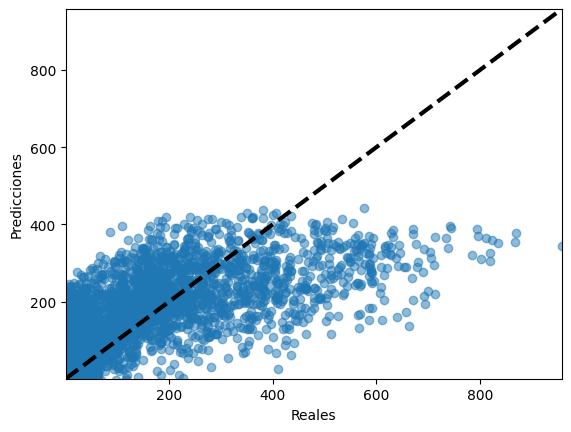

In [104]:
plt.scatter(y_test, y_pred_0, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k', linewidth=3)

plt.xlim([min(y_test), max(y_test)])  
plt.ylim([min(y_test), max(y_test)])  

plt.xlabel("Reales")
plt.ylabel("Predicciones")
plt.show()

##### Polynomial

In [105]:
best_degree = 0
best_r2 = -float('inf')

for degree in range(2, 7):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)

    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)

    y_pred = poly_model.predict(X_test_poly)
    r2 = r2_score(y_test, y_pred)

    if r2 > best_r2:
        best_r2 = r2
        best_degree = degree

    print(f'Degree: {degree}, R-squared: {r2}')

print(f'Best Degree: {best_degree}, Best R-squared: {best_r2}')

Degree: 2, R-squared: 0.5520528555261244
Degree: 3, R-squared: 0.6325492072115696
Degree: 4, R-squared: -1.0011200850132064e+16
Degree: 5, R-squared: -245074213489727.8
Degree: 6, R-squared: -111809848858252.61
Best Degree: 3, Best R-squared: 0.6325492072115696


In [106]:
poly = PolynomialFeatures(best_degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

# Con los datos preparados para un polinomio, añadimos el entrenamiento para la regresión
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predictions
y_pred2 = poly_model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred2)
print('Mean squared error:', mse)
print('R-squared:', r2)
print('Root Mean Squared Error:', rmse)

Mean squared error: 9963.500887722368
R-squared: 0.6325492072115696
Root Mean Squared Error: 99.81733761086983


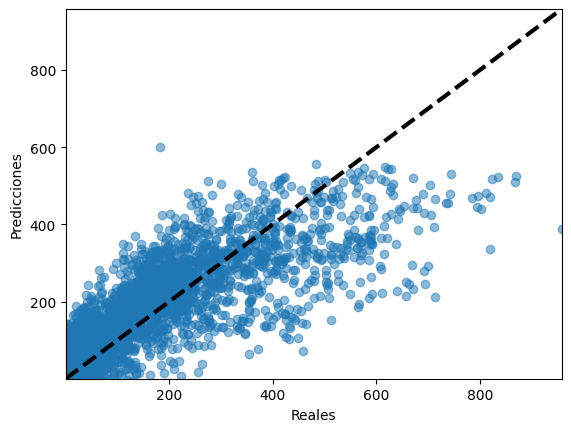

In [107]:
plt.scatter(y_test, y_pred2, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k', linewidth=3)

plt.xlim([min(y_test), max(y_test)])  
plt.ylim([min(y_test), max(y_test)])  

plt.xlabel("Reales")
plt.ylabel("Predicciones")
plt.show()

##### Decision Tree

In [108]:
tree = DecisionTreeRegressor(random_state=79)
tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 79,
 'splitter': 'best'}

In [109]:
param_grid = {"max_depth": [2, 4, 6, 8]}
dtr_grid = GridSearchCV(tree, param_grid, cv=3, scoring= "r2")

dtr_grid.fit(X_train, y_train)

print("Mejores parámetros:", dtr_grid.best_params_)

Mejores parámetros: {'max_depth': 8}


In [110]:
optimized = dtr_grid.best_estimator_

# Evaluar el modelo
y_pred = optimized.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R^2: {:.4f}".format(r2))
print("RMSE: {:.2f}".format(rmse))

R^2: 0.8179
RMSE: 70.26


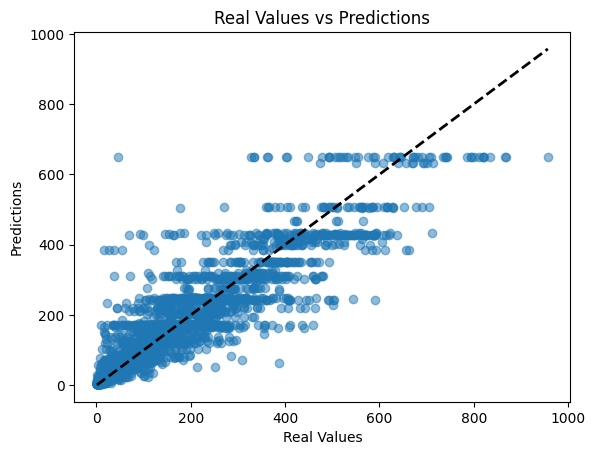

In [111]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k', linewidth=2)
plt.title("Real Values vs Predictions")
plt.xlabel("Real Values")
plt.ylabel("Predictions")
plt.show()

##### Increasing the Parametrization

In [112]:
tree_2 = DecisionTreeRegressor()

# Increasing the complexity of the parametrization
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],  
    'min_samples_split': [2, 10, 20],         
    'min_samples_leaf': [1, 5, 10, 20],      
    'max_features': [None, 'auto', 'sqrt', 'log2'], 
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],  
    'max_leaf_nodes': [None, 10, 20, 50, 100],  
    'min_impurity_decrease': [0.0, 0.01, 0.1]  
}

optimized_2 = GridSearchCV(estimator=tree_2, 
                         param_grid=param_grid, 
                         cv=3,               
                         scoring='r2',       
                         n_jobs=-1,         
                         verbose=1)         

# Adjusting the model
optimized_2.fit(X_train, y_train)

print("Mejores parámetros:", optimized_2.best_params_)
print("Mejor puntuación R2:", optimized_2.best_score_)


Fitting 3 folds for each of 17280 candidates, totalling 51840 fits


c:\Users\Marc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning:


12960 fits failed out of a total of 51840.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6234 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Marc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Marc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\Marc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ba

Mejores parámetros: {'criterion': 'poisson', 'max_depth': 20, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 20}
Mejor puntuación R2: 0.8920625933863756


c:\Users\Marc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning:

One or more of the test scores are non-finite: [0.85825687 0.88346558 0.88988395 ... 0.53183284 0.6270826  0.47890572]



We have increased quite a lot the precision of the model but it is important to notice that this precision has costed us 50 minutos, which is a way more than in the previous models, that where taking only 3 minutes each

In [113]:
best_tree_model = DecisionTreeRegressor(
    criterion='poisson',            
    max_depth=20,                   
    max_features=None,              
    max_leaf_nodes=None,            
    min_impurity_decrease=0.0,      
    min_samples_leaf=5,             
    min_samples_split=20            
)

best_tree_model.fit(X_train, y_train)
y_test_pred = best_tree_model.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"R2 en el conjunto de prueba: {r2_test}")
print(f"MSE en el conjunto de prueba: {mse_test}")


R2 en el conjunto de prueba: 0.9110589299283839
MSE en el conjunto de prueba: 2411.6546977318876


##### Checking the Overfitting

In [114]:
y_train_pred = optimized_2.predict(X_train)
y_test_pred = optimized_2.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)

r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"R2 training: {r2_train}")
print(f"R2 test: {r2_test}")
print(f"MS training: {mse_train}")
print(f"MSE test: {mse_test}")


R2 training: 0.9463630866364158
R2 test: 0.9110589299283839
MS training: 1504.9723092555723
MSE test: 2411.6546977318876


Let's see the learning curves of the model, just to understand an graphically observe the existing differences among the training and testing sets.

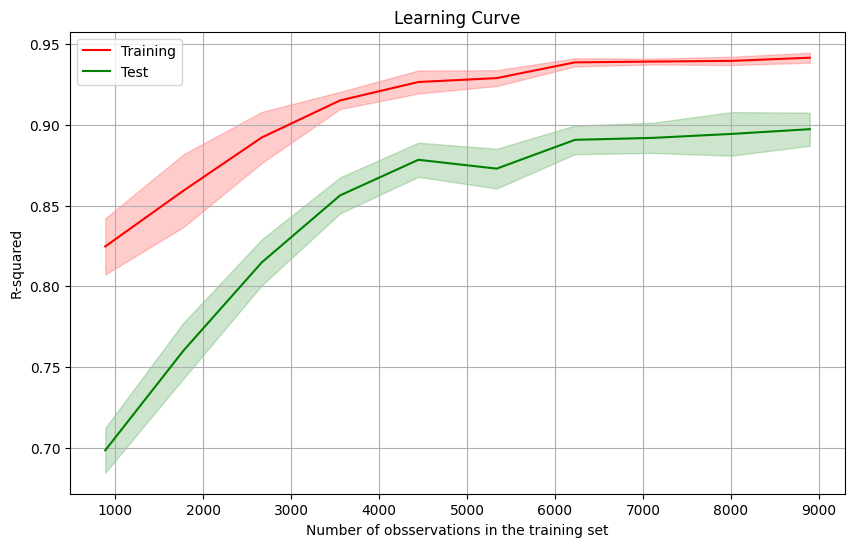

In [115]:
train_sizes, train_scores, test_scores = learning_curve(
    optimized_2.best_estimator_, X_train, y_train, cv=5, scoring='r2',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Visualizar las curvas de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training", color="r")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color="r", alpha=0.2)
plt.plot(train_sizes, test_scores_mean, label="Test", color="g")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color="g", alpha=0.2)

plt.title("Learning Curve")
plt.xlabel("Number of obsservations in the training set")
plt.ylabel("R-squared")
plt.legend(loc="best")
plt.grid()
plt.show()


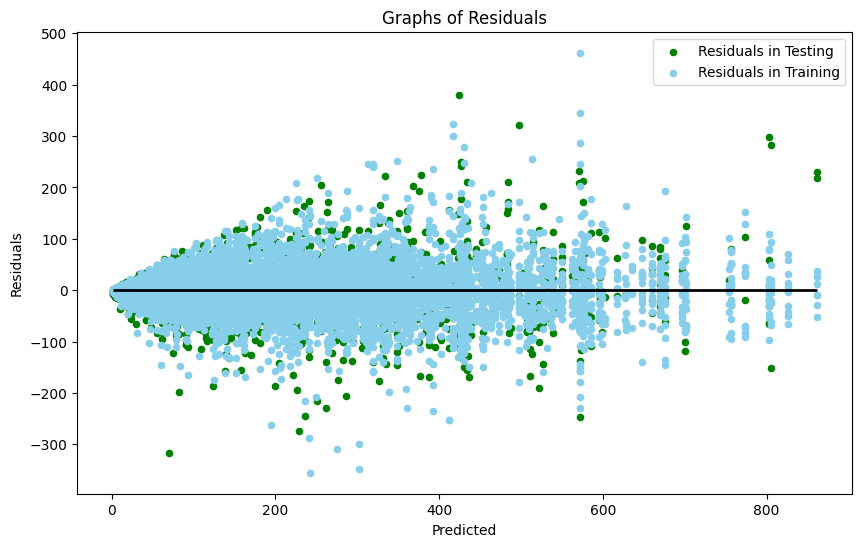

In [116]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, y_test_pred - y_test, color="green", s=20, label='Residuals in Testing')
plt.scatter(y_train_pred, y_train_pred - y_train, color="skyblue", s=20, label='Residuals in Training')

plt.hlines(y=0, xmin=min(y_test_pred), xmax=max(y_test_pred), color='black', lw=2)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.legend(loc='best')
plt.title("Graphs of Residuals")
plt.show()


We can observe from the residual graphs that the training and testing residuals are similarly disperse, moreover, it id difficult to identify patterns among the training residuals that do not exist in the testing ones. So it does not seems to exist any overfitting

##### Visualizing the Models

*PCA: reduction of dimensionality to being able to create the graph*

In [117]:
pca = PCA(n_components=1)
X_test_reduced = pca.fit_transform(X_test)
X_train_reduced = pca.transform(X_train)


We have also been forced to graph only a small portion of the total data because if not, the explicability is not good. Here it still not really clear but we can analyze some clear differents in the performance of some of the models created. By the way, the best way to evaluate and compare the models has definetivaly been the evaluation metrics.

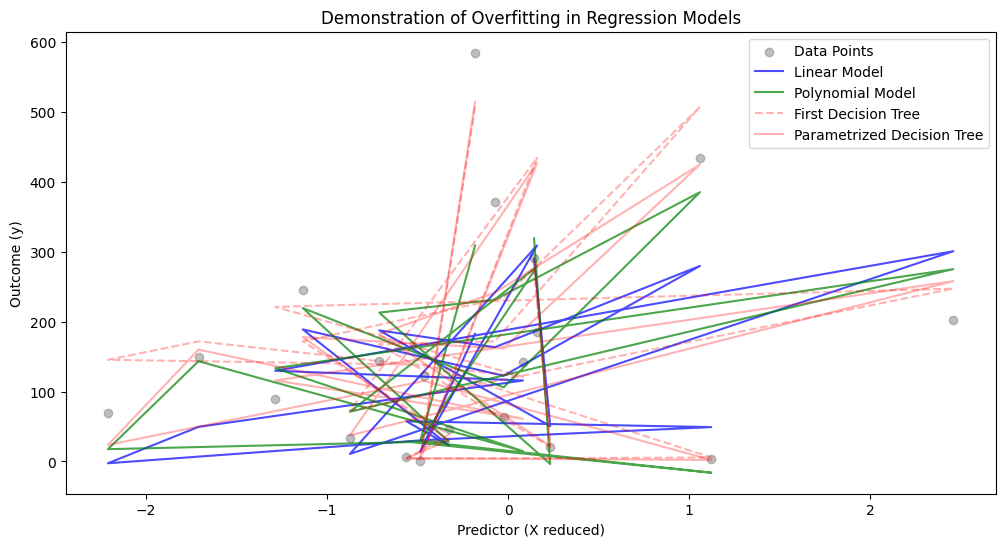

In [118]:
sample_indices = np.random.choice(np.arange(len(X_test_reduced)), size=20, replace=False)

plt.figure(figsize=(12, 6))

plt.scatter(X_test_reduced[sample_indices], y_test.iloc[sample_indices], color='gray', label='Data Points', alpha=0.5)

plt.plot(X_test_reduced[sample_indices], y_pred_0[sample_indices], label='Linear Model', color='blue', alpha=0.7)
plt.plot(X_test_reduced[sample_indices], y_pred2[sample_indices], label='Polynomial Model', color='green', alpha=0.7)
plt.plot(X_test_reduced[sample_indices], y_pred[sample_indices], label='First Decision Tree', color='red', linestyle='dashed', alpha=0.3)
plt.plot(X_test_reduced[sample_indices], y_test_pred[sample_indices], label='Parametrized Decision Tree', color='red', linestyle='solid', alpha=0.3)

plt.xlabel('Predictor (X reduced)')
plt.ylabel('Outcome (y)')
plt.title('Demonstration of Overfitting in Regression Models')
plt.legend()

plt.show()


### Predictions for the Test Dataset

In [119]:
test_data = pd.read_csv('test.csv')
test_data.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,2012-08-07,3,1,8,12,0,2,1,2,0.80,0.7576,0.55,0.1343
1,2012-08-07,3,1,8,13,0,2,1,2,0.80,0.7424,0.52,0.1940
2,2012-08-07,3,1,8,14,0,2,1,2,0.82,0.7576,0.46,0.0000
3,2012-08-07,3,1,8,15,0,2,1,1,0.80,0.7424,0.52,0.0000
4,2012-08-07,3,1,8,16,0,2,1,3,0.76,0.7273,0.66,0.2836


In [120]:
# Convert 'dteday' column to datetime format
test_data['dteday'] = pd.to_datetime(test_data['dteday'])
test_data['monthday'] = test_data['dteday'].dt.day

test_data.tail()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,monthday
3471,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,31
3472,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,31
3473,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,31
3474,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,31
3475,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,31


In [121]:
test_data_reduced = test_data.drop(columns = ['dteday','season','weekday','atemp','monthday'])

In [122]:
test_data_reduced.head()

,yr,mnth,hr,holiday,workingday,weathersit,temp,hum,windspeed
0,1,8,12,0,1,2,0.80,0.55,0.1343
1,1,8,13,0,1,2,0.80,0.52,0.1940
2,1,8,14,0,1,2,0.82,0.46,0.0000
3,1,8,15,0,1,1,0.80,0.52,0.0000
4,1,8,16,0,1,3,0.76,0.66,0.2836


In [123]:
# Extract date and hour information from test_data
test_data_reduced['timestamp'] = pd.to_datetime(test_data['dteday']) + pd.to_timedelta(test_data['hr'], unit='h')

# Scale the reduced test data (excluding timestamp)
test_data_scaled = scaler.transform(test_data_reduced.drop(columns=['timestamp']))

# Make predictions
predictions = best_tree_model.predict(test_data_scaled)

# Create a dictionary to store predictions
predictions_dict = {}

# Iterate over predictions and create the dictionary
for timestamp, prediction in zip(test_data_reduced['timestamp'], predictions.round(2)):
    predictions_dict[timestamp.strftime('%Y-%m-%d %H:%M')] = prediction



In [124]:
predictions_dict

{'2012-08-07 12:00': 298.0,
 '2012-08-07 13:00': 298.0,
 '2012-08-07 14:00': 298.0,
 '2012-08-07 15:00': 298.0,
 '2012-08-07 16:00': 334.15,
 '2012-08-07 17:00': 861.75,
 '2012-08-07 18:00': 861.75,
 '2012-08-07 19:00': 575.43,
 '2012-08-07 20:00': 364.14,
 '2012-08-07 21:00': 258.2,
 '2012-08-07 22:00': 234.58,
 '2012-08-07 23:00': 161.89,
 '2012-08-08 00:00': 61.71,
 '2012-08-08 01:00': 21.86,
 '2012-08-08 02:00': 11.6,
 '2012-08-08 03:00': 4.6,
 '2012-08-08 04:00': 7.0,
 '2012-08-08 05:00': 36.88,
 '2012-08-08 06:00': 146.4,
 '2012-08-08 07:00': 438.55,
 '2012-08-08 08:00': 696.5,
 '2012-08-08 09:00': 309.7,
 '2012-08-08 10:00': 183.6,
 '2012-08-08 11:00': 211.21,
 '2012-08-08 12:00': 298.0,
 '2012-08-08 13:00': 298.0,
 '2012-08-08 14:00': 298.0,
 '2012-08-08 15:00': 298.0,
 '2012-08-08 16:00': 483.25,
 '2012-08-08 17:00': 826.17,
 '2012-08-08 18:00': 861.75,
 '2012-08-08 19:00': 575.43,
 '2012-08-08 20:00': 468.43,
 '2012-08-08 21:00': 311.43,
 '2012-08-08 22:00': 234.58,
 '2012-08

In [125]:
# Save predictions to a JSON file
with open('predictions.json', 'w') as f:
    json.dump({'target': predictions_dict}, f, indent=4)
    
print("Prediccions generated and saved to 'predictions.json'.")

Prediccions generated and saved to 'predictions.json'.
